# Importing Libraries

In [ ]:
#Regular Imports
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Importing Dataset(Source=https://in.finance.yahoo.com/quote/GOOG/history)

In [ ]:
#Getting Stock Data online
from pandas_datareader import DataReader
from datetime import datetime

#For Training Purpose
end= datetime(2020,12,31)                              
start =datetime(end.year-2,end.month,end.day)
GOOG_train=DataReader('GOOG','yahoo',start,end)

#For Testing Purpose
end=datetime(2021,1,31)
start=datetime(2021,1,1)
GOOG_test = DataReader('GOOG','yahoo',start,end)

# Basic Analysis Of Stock WRT GOOG_train

In [ ]:
GOOG_train.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,1052.699951,1023.590027,1050.959961,1035.609985,1493300,1035.609985
2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976
2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100,1016.059998
2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900,1070.709961
2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900,1068.390015


In [ ]:
GOOG_train.describe()

,High,Low,Open,Close,Volume,Adj Close
count,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000
mean,1347.698747,1319.990127,1333.019349,1334.596491,1.652931e+06,1334.596491
std,203.863303,199.149520,201.144938,201.036621,7.374323e+05,201.036621
min,1047.489990,1013.536011,1016.570007,1016.059998,3.468000e+05,1016.059998
25%,1182.325043,1160.002502,1170.395020,1169.154999,1.215600e+06,1169.154999
50%,1301.805054,1280.000000,1291.174988,1293.655029,1.463900e+06,1293.655029
75%,1489.364990,1459.657501,1471.410004,1475.784973,1.824925e+06,1475.784973
max,1847.199951,1822.650024,1824.520020,1827.989990,6.207000e+06,1827.989990


In [ ]:
GOOG_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 2018-12-31 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       506 non-null    float64
 1   Low        506 non-null    float64
 2   Open       506 non-null    float64
 3   Close      506 non-null    float64
 4   Volume     506 non-null    int64  
 5   Adj Close  506 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 27.7 KB


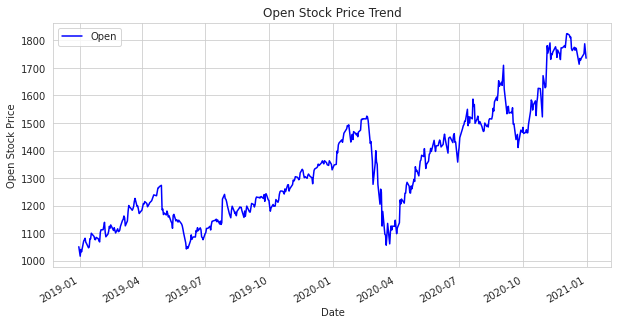

In [ ]:
GOOG_train['Open'].plot(legend=True,figsize=(10,5),color='blue')
plt.ylabel('Open Stock Price')
plt.title('Open Stock Price Trend')
plt.show()

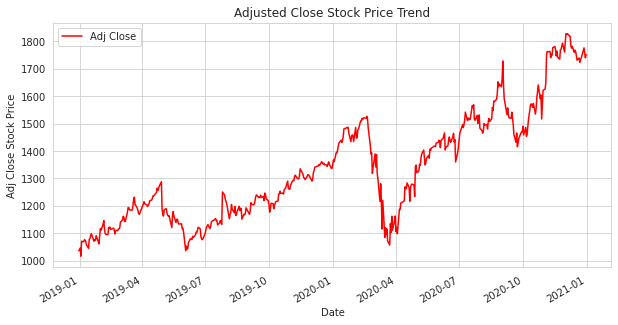

In [ ]:
GOOG_train['Adj Close'].plot(legend=True,figsize=(10,5),color='red')
plt.ylabel('Adj Close Stock Price')
plt.title('Adjusted Close Stock Price Trend')
plt.show()

scipy.stats.pearsonr() Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.The Pearson correlation coefficient measures the linear relationship between two datasets.
The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables.
For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables

pearson_r value is 0.995773374346926


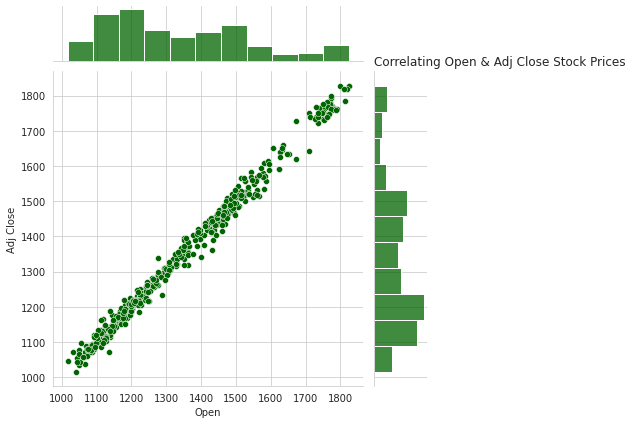

In [ ]:
#Calculating pearsonr
from scipy.stats import pearsonr
p_value,r_value= pearsonr(GOOG_train.Open,GOOG_train['Adj Close'])
print('pearson_r value is ' + str(p_value))

#plotting to visualize correlation
sns.jointplot(x='Open',y='Adj Close',data=GOOG_train,color='darkgreen',kind='scatter')
plt.title('Correlating Open & Adj Close Stock Prices',loc='left')
plt.show()

CONCLUSION- 
It can be seen from above three plots that 'Open' & 'Adj Close' stock prices for Google under the given period follow almost similar trend and thus can be seen being somewhat linearly dependant on each other as Pearson correlation coefficient(pearsonr) is ~1.

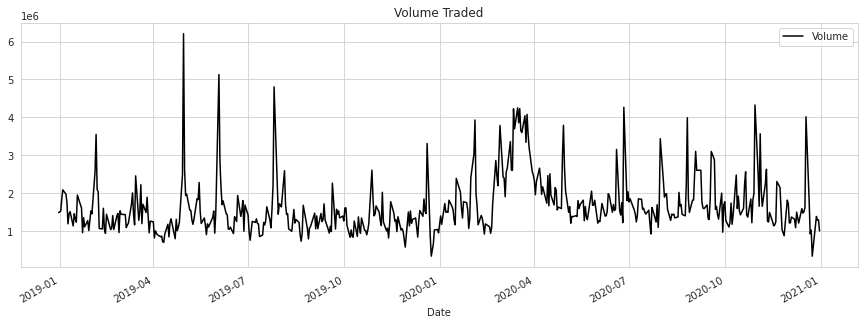

In [ ]:
GOOG_train['Volume'].plot(legend=True,figsize=(15,5),color='black')
plt.title('Volume Traded')
plt.show()


In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different
subsets of the full data set.In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis.
The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated
average price.


In [ ]:
moving_avg =[10,20,50]

for i in moving_avg:
    column_name ="MA for %s days(Open)" %(str(i))
    GOOG_train[column_name] = GOOG_train['Open'].rolling(i).mean()

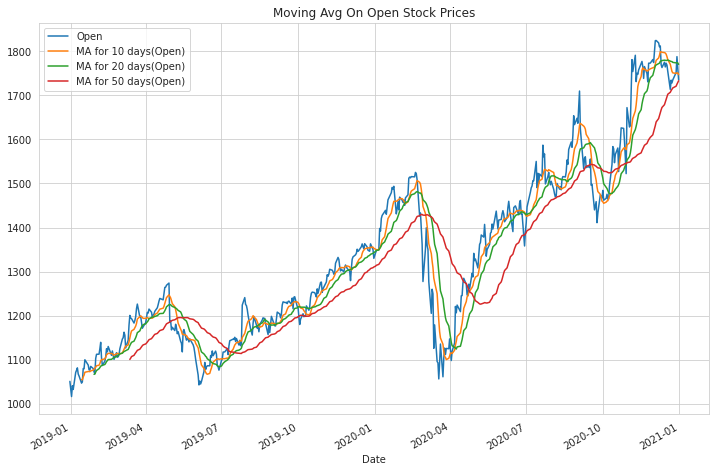

In [ ]:
GOOG_train[['Open',
      'MA for 10 days(Open)',
      'MA for 20 days(Open)',
      'MA for 50 days(Open)']].plot(subplots=False,figsize=(12,8),legend=True)
plt.title('Moving Avg On Open Stock Prices')
plt.show()

In [ ]:
moving_avg =[10,20,50]

for i in moving_avg:
    column_name ="MA for %s days(Adj Close)" %(str(i))
    GOOG_train[column_name] = GOOG_train['Adj Close'].rolling(i).mean()

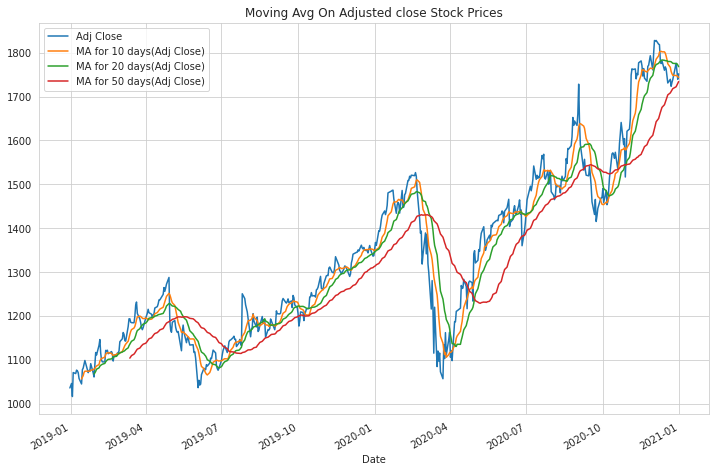

In [ ]:
GOOG_train[['Adj Close',
      'MA for 10 days(Adj Close)',
      'MA for 20 days(Adj Close)',
      'MA for 50 days(Adj Close)']].plot(subplots=False,figsize=(12,8),legend=True)
plt.title('Moving Avg On Adjusted close Stock Prices')
plt.show()

CONCLUSION-The Moving averages over 10,20 & 50 days respectively follow similar trend both for Open as well as Adj Close stock price

NOW,
The adjusted closing price of a stock takes into account dividend payments, splits and other factor which directly influence 
overall return. Comparing the adjusted closing prices for a single stock over a specific duration of time will allow us to 
identify its return.
To calculate daily stock return, it is needed to compare the closing price of the given day in question to the closing price from the previous day. The formula for percentage return begins by dividing the current day's price by the prior day's price. The number 1 is then subtracted from this result before multiplying the resulting figure by 100 to convert it from decimal to percentage format.

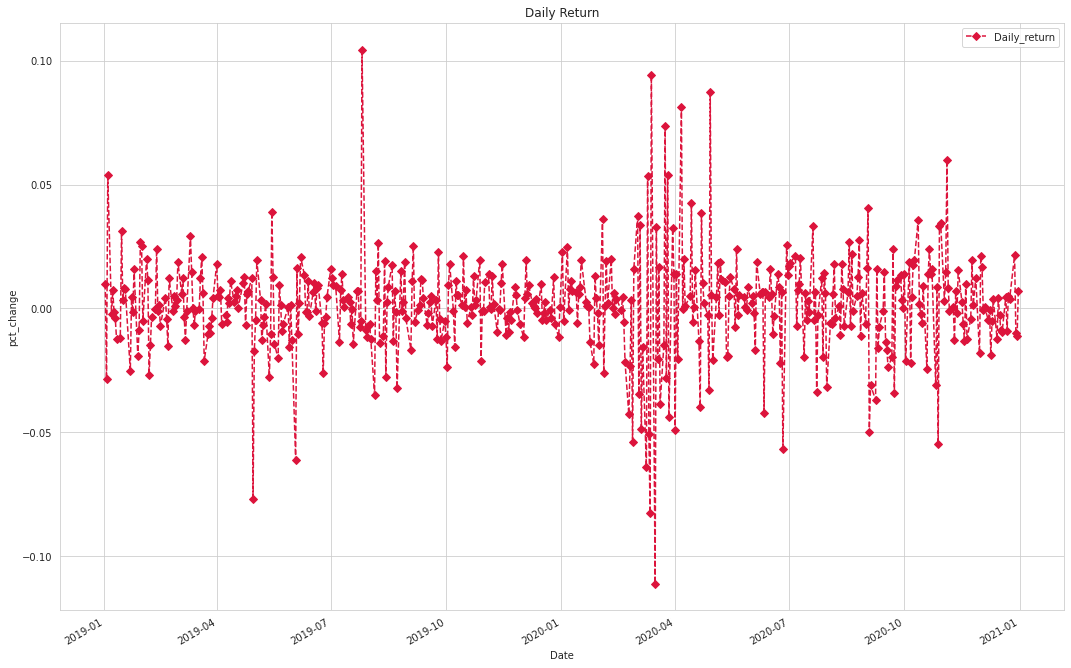

In [ ]:
GOOG_train['Daily_return']=GOOG_train['Adj Close'].pct_change()
GOOG_train['Daily_return'].plot(legend=True,
                               figsize=(18,12),
                               linestyle='--',
                               marker='D',color='crimson')
plt.title('Daily Return')
plt.ylabel('pct_change')
plt.show()

let's get an overall look at the average daily return using a histogram along with kde plot, using seaborn to create a kde plot and pyplot to create histogram on the same figure.

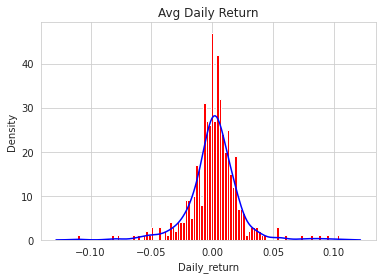

In [ ]:
sns.kdeplot(x=GOOG_train['Daily_return'].dropna(),color='blue')
plt.hist(x=GOOG_train['Daily_return'].dropna(),color='red',bins=100)
plt.title('Avg Daily Return')
plt.show()


# Creating RNN with LSTM model to make stock trend (Open) prediction for January 2021

Getting the Open Stock Prices for model

In [ ]:
training_set=GOOG_train.iloc[: ,2:3].values

Applying Normalization To Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm_sc = MinMaxScaler(feature_range=(0,1))
scaled_training_set= norm_sc.fit_transform(training_set)

Creating 60 Time Step Data Structure

In [ ]:
X_train=list()
y_train=list()
for i in range (60 ,training_set.shape[0]):
    X_train.append(scaled_training_set[ i-60 :i ,0])
    y_train.append(scaled_training_set[ i,0])
X_train ,y_train =np.array(X_train) ,np.array(y_train)

In [ ]:
X_train=np.reshape(X_train ,(X_train.shape[0], X_train.shape[1] , 1))

Building The RNN model with 6 LSTM layers along with Dropout regularization

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor= Sequential()

regressor.add(LSTM(units=50,return_sequences=True , input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

Training The Model

In [ ]:
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam' ,loss='mean_squared_error')
regressor.fit(X_train,y_train, batch_size=32 ,epochs=100)

Epoch 1/100
14/14 [==============================] - 12s 173ms/step - loss: 0.1210
Epoch 2/100
14/14 [==============================] - 2s 173ms/step - loss: 0.0247
Epoch 3/100
14/14 [==============================] - 2s 174ms/step - loss: 0.0221
Epoch 4/100
14/14 [==============================] - 3s 179ms/step - loss: 0.0197
Epoch 5/100
14/14 [==============================] - 2s 170ms/step - loss: 0.0157
Epoch 6/100
14/14 [==============================] - 2s 171ms/step - loss: 0.0165
Epoch 7/100
14/14 [==============================] - 2s 172ms/step - loss: 0.0163
Epoch 8/100
14/14 [==============================] - 2s 169ms/step - loss: 0.0154
Epoch 9/100
14/14 [==============================] - 2s 173ms/step - loss: 0.0130
Epoch 10/100
14/14 [==============================] - 2s 170ms/step - loss: 0.0168
Epoch 11/100
14/14 [==============================] - 2s 172ms/step - loss: 0.0156
Epoch 12/100
14/14 [==============================] - 2s 171ms/step - loss: 0.0125
Epoch 13/100

# Making The Prediction for January 2021

In [ ]:
GOOG_test.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,1760.650024,1707.849976,1757.540039,1728.239990,1901900,1728.239990
2021-01-05,1747.670044,1718.015015,1725.000000,1740.920044,1145300,1740.920044
2021-01-06,1748.000000,1699.000000,1702.630005,1735.290039,2602100,1735.290039
2021-01-07,1788.400024,1737.050049,1740.060059,1787.250000,2265000,1787.250000
2021-01-08,1809.839966,1773.535034,1787.979980,1807.209961,2050600,1807.209961


In [ ]:
GOOG_test.describe()

,High,Low,Open,Close,Volume,Adj Close
count,19.000000,19.000000,19.000000,19.000000,1.900000e+01,19.000000
mean,1830.654997,1782.300801,1802.270000,1808.383693,1.741195e+06,1808.383693
std,70.145961,65.704537,69.906849,67.250379,5.244471e+05,67.250379
min,1747.670044,1699.000000,1702.630005,1728.239990,1.094100e+06,1728.239990
25%,1770.022522,1729.355042,1746.155029,1743.735046,1.292600e+06,1743.735046
50%,1809.275024,1760.520020,1786.069946,1790.859985,1.734600e+06,1790.859985
75%,1901.269958,1834.085022,1864.350037,1875.005005,2.057250e+06,1875.005005
max,1934.859985,1887.109985,1920.670044,1917.239990,2.748300e+06,1917.239990


Getting the Open Stock Prices for model

In [ ]:
Actual_stock_Price= GOOG_test.iloc[:,2:3].values

Testing The Model & Making Prediction For Jan-2021.

In [ ]:
dataset_total= pd.concat((GOOG_train['Open'] ,GOOG_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total) -len(GOOG_test) -60 :].values
inputs=inputs.reshape(-1 ,1)
inputs=norm_sc.transform(inputs)
X_test=[]
for i in range (60,inputs.shape[0]):
    X_test.append(inputs[i-60:i ,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test ,(X_test.shape[0] ,X_test.shape[1], 1))
predicted_stock=norm_sc.inverse_transform(regressor.predict(X_test))

Concatenating Prediction To The Actual Stock Prices

In [ ]:
concat_results=np.concatenate((predicted_stock,Actual_stock_Price),axis=1)
comparison_df= DataFrame(concat_results)
comparison_df.columns =['Predicted_stock_Open_Jan-21','Actual_Stock_Open_Jan-21']
comparison_df.index=GOOG_test.index
comparison_df.head()

,Predicted_stock_Open_Jan-21,Actual_Stock_Open_Jan-21
Date,,
2021-01-04,1783.386719,1757.540039
2021-01-05,1786.788574,1725.000000
2021-01-06,1782.608032,1702.630005
2021-01-07,1771.410889,1740.060059
2021-01-08,1758.501587,1787.979980


Calculating Error % (|Measured Value-True Value|/True Value)



In [ ]:
comparison_df['Error%'] = np.abs((comparison_df['Predicted_stock_Open_Jan-21']-comparison_df['Actual_Stock_Open_Jan-21'])/comparison_df['Actual_Stock_Open_Jan-21'])*100

In [ ]:
comparison_df

,Predicted_stock_Open_Jan-21,Actual_Stock_Open_Jan-21,Error%
Date,,,
2021-01-04,1783.386719,1757.540039,1.470617
2021-01-05,1786.788574,1725.000000,3.581946
2021-01-06,1782.608032,1702.630005,4.697323
2021-01-07,1771.410889,1740.060059,1.801710
2021-01-08,1758.501587,1787.979980,1.648698
2021-01-11,1751.829590,1786.069946,1.917078
2021-01-12,1755.047852,1753.920044,0.064302
2021-01-13,1763.726074,1738.579956,1.446360
2021-01-14,1770.488281,1753.619995,0.961912


In [ ]:
avg_abs_error=comparison_df['Error%'].mean()
print('The Average Absolute Error% is ' + str(avg_abs_error))

The Average Absolute Error% is 2.5115676245587877


Visualizing The Comparison

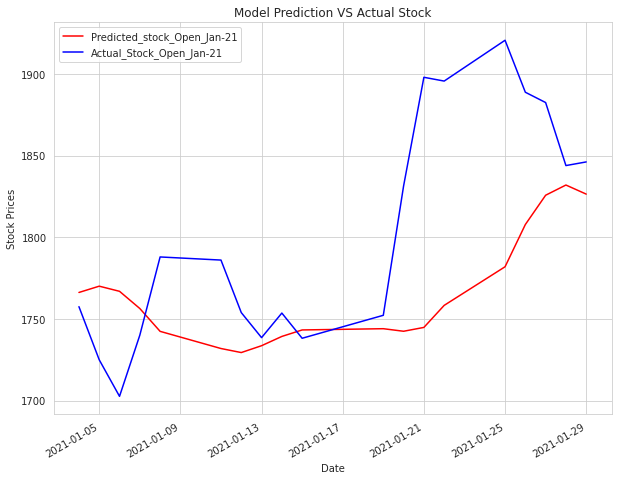

In [ ]:
comparison[['Predicted_stock_Open_Jan-21','Actual_Stock_Open_Jan-21']].plot(legend=True,figsize=(10,8),color=['red','blue'])
plt.title('Model Prediction VS Actual Stock')
plt.ylabel('Stock Prices')
plt.show()

# Comments-


Stock prices are random in nature.Based on previous datasets it is difficult to predict the relatively exact stock price of next day as these events depend on no.of factors & are absolutely random with no correlation with previous prices,so we can at best predict the trend of the stock price (upward /downward trend) that I tried to predict here.